## Reto 5: Limpiando un dataset

### 1. Objetivos:
    - Aplicar todo lo que aprendimos el día de hoy a un dataset real
 
---
    
### 2. Desarrollo:

#### a) Limpieza de datos en el mundo real

Hasta ahora hemos estado realizando ejercicios con datasets dummy (falsos). Ahora vamos a aplicar todo lo que hemos aprendido el día de hoy a un dataset real.

El dataset se encuentra en la carpeta [Datasets](../../Datasets/Readme.md) en la raíz del repositorio. El nombre el dataset es 'melbourne_housing-raw.csv'.

Lee el dataset usando pandas y realiza las siguientes tareas:

1. Ve a este [link](https://www.kaggle.com/anthonypino/melbourne-housing-market) para conocer más sobre el dataset y los datos que contiene.
2. Explora tu dataset para entender su estructura
3. Identifica los `NaNs` en el dataset y dónde se encuentran
4. Elimina los `NaNs` de tu dataset
5. Resetea tu índice para que sea compatible con el nuevo dataset
6. Cambia los nombres de las columnas para que tengan consistencia y no haya errores ortográficos
7. Realiza agregaciones (min, man, mean, etc) de las siguientes filas para conocer mejor la distribución de tus datos:
    a) Price
    b) Distance
    c) Landsize
    
Si tienes dudas en algún momento, por favor pídele a la experta que te oriente. Todas las tareas que hay que realizar ya las hemos hecho en otros retos; puedes ir a revisar esos otros ejercicios para recordar.

¡Mucha suerte!

In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/beduExpert/Procesamiento-de-Datos-con-Python-Santander_2020_2021/master/Datasets/melbourne_housing-raw.csv')

In [6]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19740 entries, 0 to 19739
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         19740 non-null  object 
 1   Address        19740 non-null  object 
 2   Rooms          19740 non-null  int64  
 3   Type           19740 non-null  object 
 4   Price          15396 non-null  float64
 5   Method         19740 non-null  object 
 6   SellerG        19740 non-null  object 
 7   Date           19740 non-null  object 
 8   Distance       19732 non-null  float64
 9   Postcode       19732 non-null  float64
 10  Bedroom2       15327 non-null  float64
 11  Bathroom       15327 non-null  float64
 12  Car            15327 non-null  float64
 13  Landsize       14944 non-null  float64
 14  BuildingArea   8617 non-null   float64
 15  YearBuilt      9351 non-null   float64
 16  CouncilArea    15296 non-null  object 
 17  Lattitude      15448 non-null  float64
 18  Longti

In [11]:
df.shape

(19740, 21)

In [13]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             4344
Method               0
SellerG              0
Date                 0
Distance             8
Postcode             8
Bedroom2          4413
Bathroom          4413
Car               4413
Landsize          4796
BuildingArea     11123
YearBuilt        10389
CouncilArea       4444
Lattitude         4292
Longtitude        4292
Regionname           8
Propertycount        8
dtype: int64

In [24]:
# borramos building Area y year built porque tiene demasiados na
df_copy = df.copy()
df_copy.drop(columns=['BuildingArea','YearBuilt'], inplace=True)

In [25]:
df_copy.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price            4344
Method              0
SellerG             0
Date                0
Distance            8
Postcode            8
Bedroom2         4413
Bathroom         4413
Car              4413
Landsize         4796
CouncilArea      4444
Lattitude        4292
Longtitude       4292
Regionname          8
Propertycount       8
dtype: int64

In [35]:
df_copy.loc[df_copy['Propertycount'].isna() | df_copy['Regionname'].isna()]


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
17628,Maidstone,1/1 Clarendon St,3,t,650000.0,PI,Jas,8/07/2017,6.4,3012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3873.0
18146,MacLeod,275 Greensborough Rd,3,h,682000.0,S,Barry,12/08/2017,NaN,NaN,4.0,3.0,2.0,575.0,Banyule,-37.77336,145.05829,Eastern Metropolitan,NaN
18522,Footscray Lot,2/16 Stafford St,2,u,710000.0,S,Jas,15/07/2017,NaN,NaN,3.0,1.0,3.0,621.0,Casey,-37.98537,145.23505,NaN,NaN
18591,MacLeod,19 Hinkler Av,4,h,825000.0,PI,Purplebricks,15/07/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18592,MacLeod,32b Jacka St,2,u,770000.0,S,Nelson,15/07/2017,NaN,NaN,2.0,1.0,2.0,1955.0,Banyule,-37.73759,145.04236,NaN,NaN
19040,MacLeod,1/15 Cherry St,3,u,NaN,SN,Miles,22/07/2017,NaN,NaN,4.0,2.0,2.0,1998.0,Bayside,-37.94999,145.03122,NaN,NaN
19041,MacLeod,73 Somers Av,3,h,910000.0,S,Ray,22/07/2017,NaN,NaN,2.0,1.0,3.0,1950.0,Bayside,-37.95023,145.03081,NaN,NaN
19042,MacLeod,43 Wungan St,3,h,710000.0,S,Ray,22/07/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19542,MacLeod,94 Torbay St,3,h,1210000.0,S,Darren,29/07/2017,NaN,NaN,3.0,1.0,2.0,1965.0,Monash,-37.90904,145.10903,NaN,NaN


In [39]:
df_copy.dropna(axis=0, how='any', inplace=True)
df_copy.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [44]:
df_copy.reset_index(drop=True, inplace=True)

df_copy.isna().sum()

suburb            0
address           0
rooms             0
type              0
price             0
method            0
seller_g          0
date              0
distance          0
post_code         0
bedrooms          0
bathroom          0
car               0
land_size         0
council_area      0
latitude          0
longitude         0
region_name       0
property_count    0
dtype: int64

In [43]:
column_name_mapping = {
    'Suburb': 'suburb',
    'Address': 'address',
    'Rooms': 'rooms',
    'Type': 'type',
    'Price': 'price',
    'Method': 'method',
    'SellerG': 'seller_g',
    'Date': 'date',
    'Distance': 'distance',
    'Postcode': 'post_code',
    'Bedroom2': 'bedrooms',
    'Bathroom': 'bathroom',
    'Car': 'car',
    'Landsize': 'land_size',
    'CouncilArea': 'council_area',
    'Lattitude': 'latitude',
    'Longtitude': 'longitude',
    'Regionname': 'region_name',
    'Propertycount': 'property_count'
}
df_copy.rename(columns=column_name_mapping, inplace=True)

In [45]:
df_copy.columns

Index(['suburb', 'address', 'rooms', 'type', 'price', 'method', 'seller_g',
       'date', 'distance', 'post_code', 'bedrooms', 'bathroom', 'car',
       'land_size', 'council_area', 'latitude', 'longitude', 'region_name',
       'property_count'],
      dtype='object')

Realiza agregaciones (min, man, mean, etc) de las siguientes filas para conocer mejor la distribución de tus datos: a) Price b) Distance c) Landsize

In [48]:
df_agregaciones = df_copy[['price','distance','land_size']]
df_agregaciones.min()

price        85000.0
distance         0.0
land_size        0.0
dtype: float64

In [49]:
df_agregaciones.max()

price        9000000.0
distance          47.4
land_size      76000.0
dtype: float64

In [50]:
df_agregaciones.mean()

price        1.068142e+06
distance     9.583059e+00
land_size    5.544581e+02
dtype: float64

In [52]:
df_agregaciones.count()

price        11646
distance     11646
land_size    11646
dtype: int64

In [54]:
df_agregaciones.std()

price        643728.191437
distance          5.304187
land_size      1460.432326
dtype: float64

price           AxesSubplot(0.125,0.125;0.227941x0.755)
distance     AxesSubplot(0.398529,0.125;0.227941x0.755)
land_size    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

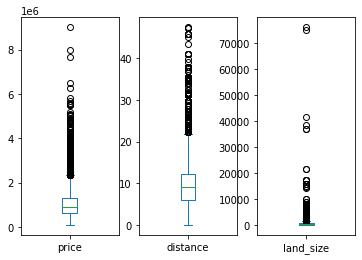

In [62]:
df_agregaciones.plot.box(subplots=True)

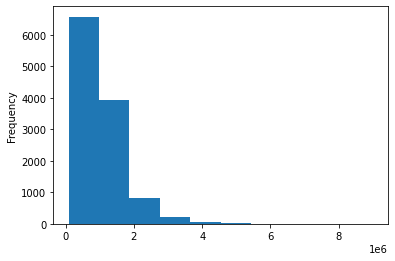

In [65]:
df_agregaciones['price'].plot.hist()

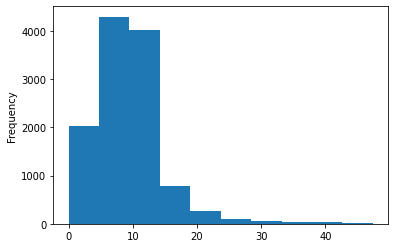

In [67]:
df_agregaciones['distance'].plot.hist()

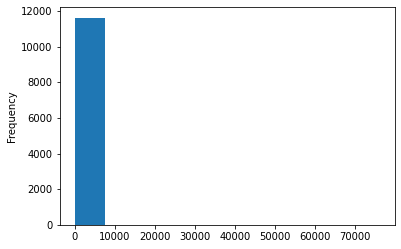

In [66]:
df_agregaciones['land_size'].plot.hist()

In [69]:
df_agregaciones.describe().T

,count,mean,std,min,25%,50%,75%,max
price,11646.0,1.068142e+06,643728.191437,85000.0,640000.0,895500.0,1325000.0,9000000.0
distance,11646.0,9.583059e+00,5.304187,0.0,5.9,9.1,12.3,47.4
land_size,11646.0,5.544581e+02,1460.432326,0.0,162.0,412.0,656.0,76000.0


In [23]:
df_copy.to_csv('melbourne_housing-no_nans.csv')